## Stochastic Hill Climbing
Implementação para resolução do problema das 8 rainhas.
### Fluxograma
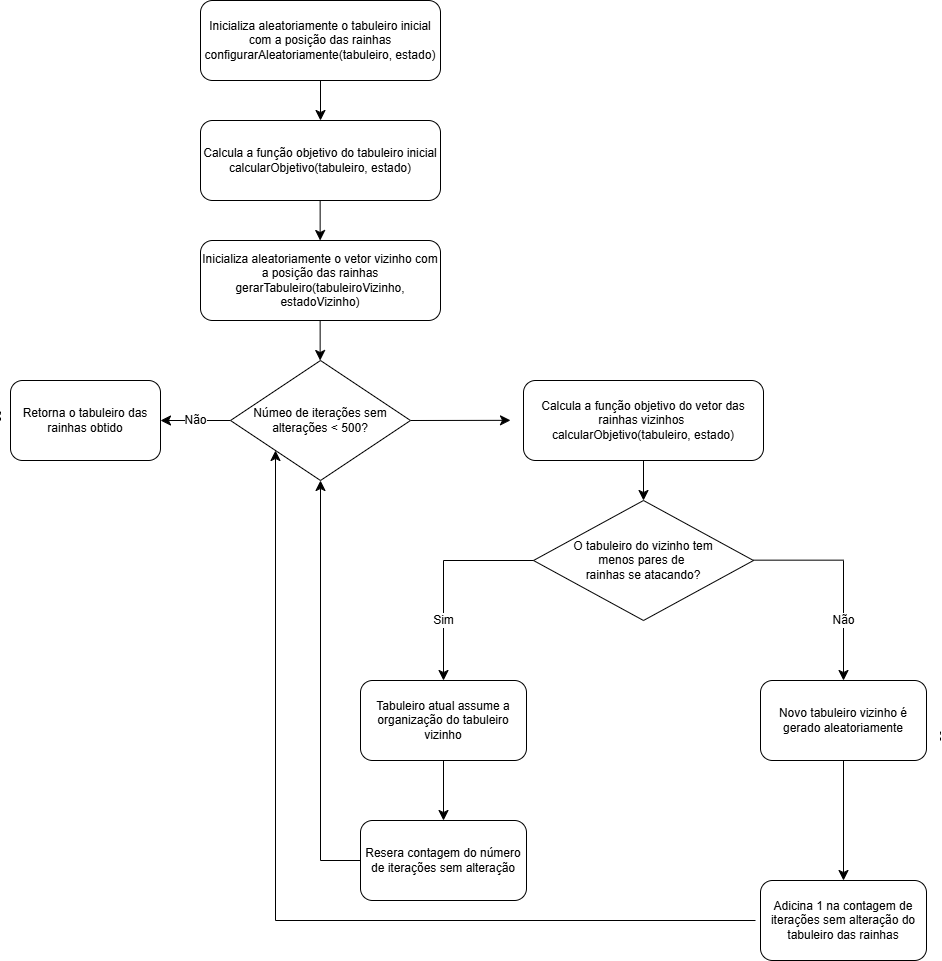

In [53]:
import random
from random import randint
import statistics
import time

SEED = 10
random.seed(SEED)
N = 8

def configurarAleatoriamente(tabuleiro, estado):
	# Inicializa o tabuleiro e o estado das rainhas de forma aleatória.
	for i in range(N):
		estado[i] = randint(0, 100000) % N
		tabuleiro[estado[i]][i] = 1

def imprimirTabuleiro(tabuleiro):
	# Imprime o tabuleiro no console.
	for i in range(N):
		print(*tabuleiro[i])

def preencher(tabuleiro, valor):
	# Preenche todo o tabuleiro com um determinado valor.
	for i in range(N):
		for j in range(N):
			tabuleiro[i][j] = valor

def calcularObjetivo(tabuleiro, estado):
	# Calcula o número de pares de rainhas que se atacam no tabuleiro.
	ataques = 0
	for i in range(N):
		# Verificar ataques na mesma linha
		linha = estado[i]
		coluna = i - 1
		while coluna >= 0 and tabuleiro[linha][coluna] != 1:
			coluna -= 1
		if coluna >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
		coluna = i + 1
		while coluna < N and tabuleiro[linha][coluna] != 1:
			coluna += 1
		if coluna < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		
        # Verificar ataques nas diagonais
		# Superior esquerda
		linha, coluna = estado[i] - 1, i - 1
		while coluna >= 0 and linha >= 0 and tabuleiro[linha][coluna] != 1:
			coluna -= 1
			linha -= 1
		if coluna >= 0 and linha >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Inferior direita
		linha, coluna = estado[i] + 1, i + 1
		while coluna < N and linha < N and tabuleiro[linha][coluna] != 1:
			coluna += 1
			linha += 1
		if coluna < N and linha < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Inferior esquerda
		linha, coluna = estado[i] + 1, i - 1
		while coluna >= 0 and linha < N and tabuleiro[linha][coluna] != 1:
			coluna -= 1
			linha += 1
		if coluna >= 0 and linha < N and tabuleiro[linha][coluna] == 1:
			ataques += 1
		# Superior direita
		linha, coluna = estado[i] - 1, i + 1
		while coluna < N and linha >= 0 and tabuleiro[linha][coluna] != 1:
			coluna += 1
			linha -= 1
		if coluna < N and linha >= 0 and tabuleiro[linha][coluna] == 1:
			ataques += 1
	return int(ataques / 2)

def gerarTabuleiro(tabuleiro, estado):
	# Gera um tabuleiro com base na configuração do estado.
	preencher(tabuleiro, 0)
	for i in range(N):
		tabuleiro[estado[i]][i] = 1

def copiarEstado(estado1, estado2):
	# Copia o estado de um vetor para outro.
	for i in range(N):
		estado1[i] = estado2[i]

def subidaEncosta(tabuleiro, estado):
	# Implementa o algoritmo de subida de encosta para resolver o problema das oito rainhas.
	numero_iteracoes = 0
	tempo_inicio = time.time()
	tabuleiro_vizinho = [[0 for _ in range(N)] for _ in range(N)]
	estado_vizinho = [0 for _ in range(N)]
	copiarEstado(estado_vizinho, estado)
	gerarTabuleiro(tabuleiro_vizinho, estado_vizinho)

	sem_melhoria = 0
	max_sem_melhoria = 500

	aptidao_atual = calcularObjetivo(tabuleiro, estado)
	
	while sem_melhoria < max_sem_melhoria:
		gerarTabuleiro(tabuleiro, estado)
		aptidao_vizinho = calcularObjetivo(tabuleiro_vizinho, estado_vizinho)
		if aptidao_vizinho < aptidao_atual:
			sem_melhoria = 0
			aptidao_atual = aptidao_vizinho
			copiarEstado(estado, estado_vizinho)
		else:
			sem_melhoria += 1
			estado_vizinho[randint(0, 100000) % N] = randint(0, 100000) % N
			gerarTabuleiro(tabuleiro_vizinho, estado_vizinho)
		numero_iteracoes += 1

	print("Parada por 500 iterações sem melhorias.")
	print("Número de ataques:", aptidao_atual)
	print("Configuração das rainhas:", estado)
	tempo_final = time.time() - tempo_inicio
	return aptidao_atual, estado, numero_iteracoes, tempo_final

estado = [0] * N
tabuleiro = [[0 for _ in range(N)] for _ in range(N)]

configurarAleatoriamente(tabuleiro, estado)

resultados_tabuleiro = []
configuracoes_rainhas = []
iteracoes_lista = []
tempos_lista = []
dicionario_resultados = {i: [] for i in range(28)}

for _ in range(50):
	configurarAleatoriamente(tabuleiro, estado)
	aptidao, estado_, num_iteracoes, tempo_execucao = subidaEncosta(tabuleiro, estado)
	resultados_tabuleiro.append(aptidao)
	configuracoes_rainhas.append(estado_[:])
	dicionario_resultados[aptidao].append(estado_[:])
	iteracoes_lista.append(num_iteracoes)
	tempos_lista.append(tempo_execucao)

Parada por 500 iterações sem melhorias.
Número de ataques: 3
Configuração das rainhas: [7, 4, 2, 3, 6, 0, 3, 1]
Parada por 500 iterações sem melhorias.
Número de ataques: 3
Configuração das rainhas: [0, 0, 4, 2, 5, 3, 1, 3]
Parada por 500 iterações sem melhorias.
Número de ataques: 3
Configuração das rainhas: [6, 3, 7, 2, 2, 5, 2, 0]
Parada por 500 iterações sem melhorias.
Número de ataques: 1
Configuração das rainhas: [3, 7, 6, 2, 0, 5, 1, 4]
Parada por 500 iterações sem melhorias.
Número de ataques: 3
Configuração das rainhas: [7, 1, 3, 7, 0, 4, 6, 1]
Parada por 500 iterações sem melhorias.
Número de ataques: 3
Configuração das rainhas: [7, 7, 0, 2, 6, 1, 3, 0]
Parada por 500 iterações sem melhorias.
Número de ataques: 2
Configuração das rainhas: [6, 0, 5, 1, 4, 7, 3, 4]
Parada por 500 iterações sem melhorias.
Número de ataques: 2
Configuração das rainhas: [2, 6, 2, 0, 7, 4, 0, 5]
Parada por 500 iterações sem melhorias.
Número de ataques: 2
Configuração das rainhas: [1, 5, 2, 0, 6, 4

### Resultados

In [55]:
count = 0
print('Ranking do 5 melhores')
for key, values in dicionario_resultados.items():
    for value in values:
        if count >= 5:
            break
        print(f'Numero de rainhas se atacando:{key} | Array da rainha:{value}')
        count += 1

Ranking do 5 melhores
Numero de rainhas se atacando:0 | Array da rainha:[2, 6, 1, 7, 5, 3, 0, 4]
Numero de rainhas se atacando:1 | Array da rainha:[3, 7, 6, 2, 0, 5, 1, 4]
Numero de rainhas se atacando:1 | Array da rainha:[4, 2, 0, 6, 3, 7, 5, 1]
Numero de rainhas se atacando:1 | Array da rainha:[3, 6, 4, 7, 1, 3, 5, 2]
Numero de rainhas se atacando:1 | Array da rainha:[3, 5, 2, 5, 1, 4, 7, 0]


In [56]:
print(f'Número médio de iterações por solução: {statistics.mean(iteracoes_lista)}')
print(f'Desvio padrão de iterações por solução: {statistics.stdev(iteracoes_lista)}')

Número médio de iterações por solução: 739.64
Desvio padrão de iterações por solução: 173.5195995516686


In [57]:
print(f'Tempo médio de execução por solução em segundos: {statistics.mean(tempos_lista)}')
print(f'Desvio padrão de do tempo de execução por solução em segundos: {statistics.stdev(tempos_lista)}')

Tempo médio de execução por solução em segundos: 0.010914902687072753
Desvio padrão de do tempo de execução por solução em segundos: 0.0026854603414232757
